# Sistemas LTI

As equações diferenciais que usamos tem coeficientes constantes e invariantes com o tempo. Se considerarmos sempre as condições iniciais nulas, podemos tratar o sistema como um LTI, Linear Time Invariant system.

Há muitas funções úteis para o estudo deste tipo de sistema na teoria de controle.

## Setup

In [21]:
import sympy as sp
from sympy.abc import s
from sympy.physics.control import lti
from sympy.physics.control.control_plots import bode_plot, bode_magnitude_numerical_data, bode_phase_numerical_data

## Teoria

### Excitação via força
Para um sistema com um grau de liberdade em vibração forçada amortecida, a equação diferencial é
$$ m\ddot x + c \dot x + k x = f(t),$$
podemos aplicar a transformada de Laplace em ambos os lados da equação, e rearrumando, obtemos
$$ X(s) = T(s) F(s),$$
onde 
$$T(s) = \frac{1}{ms^2+cs+k}$$
e $X(s)$ e $F(s)$ são as transformadas da saída e da excitação do sistema, respectivamente.

### Excitação via movimento da base
Para excitação  pela base, a equação diferencial é 
$$ m\ddot x + c \dot x + k x = cy(t) + ky(t),$$
com a aplicação da transformada de Laplace temos,
$$ \left( ms^2 + cs + k \right) X(s) = \left(cs + k\right) Y(s),$$
assim
$$ X(s) = T(s) Y(s),$$
com
$$ T(s) = \frac{cs+k}{ms^2 + cs + k}.$$

## Sistema mecânico
Vamos definir o sistema mecânico aqui.

In [15]:
m = 100.0
c = 1.2
k = 4000

## Função de Transferência para força externa

In [16]:
tf = lti.TransferFunction(1, m*s**2 + c*s + k, s)
display(tf)

TransferFunction(1, 100.0*s**2 + 1.2*s + 4000, s)

## Comportamento do sistema

O diagrama de Bode traduz todo o comportamento mecânico do sistema, para todas as frequências.

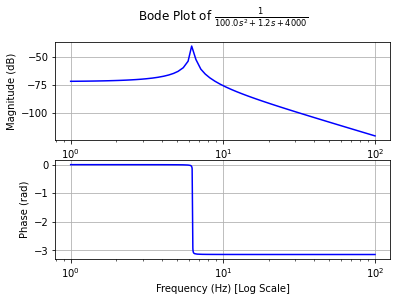

In [17]:
bode_plot(tf, initial_exp=0, final_exp=2)

## Função de transferência para excitação pela base

In [18]:
tfb =  lti.TransferFunction(c*s+k, m*s**2 + c*s + k, s)
display(tfb)

TransferFunction(1.2*s + 4000, 100.0*s**2 + 1.2*s + 4000, s)

### Diagrama de Bode

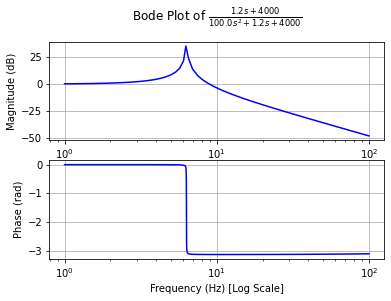

In [20]:
bode_plot(tfb, initial_exp=0, final_exp=2)

### Dados numéricos

Infelizmente estes gráficos não são muito configurárveis. Assim, pode ser melhor capturar os dados numéricos e plotar você mesmo.

In [28]:
(x, mag) = bode_magnitude_numerical_data(tf)
(x, phase) = bode_phase_numerical_data(tf)
display(x[:10])
display(mag[:10])

[1e-05,
 1.40260688085405e-05,
 1.938268431894084e-05,
 2.769914766972913e-05,
 4.219998623146348e-05,
 6.515227247914045e-05,
 9.602369009958843e-05,
 0.00015288626792210675,
 0.0002242856284261012,
 0.00035986057595197864]

[-72.04119982653754,
 -72.04119982651294,
 -72.04119982644801,
 -72.04119982632407,
 -72.04119982608294,
 -72.04119982563866,
 -72.04119982483273,
 -72.04119982304242,
 -72.04119981999406,
 -72.04119981359526]